In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [71]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [72]:
stop_words = stopwords.words()

In [73]:
df = pd.read_csv('/content/drive/MyDrive/Big_Data/data_labeled.csv')

In [74]:
df

,comment,label
0,"microphone is so bad, you cannot use during zo...",negative
1,I bought these in early January and for a whil...,positive
2,Dis like these ear buds there are no base soun...,negative
3,I have had these headphones for about 2 weeks ...,negative
4,Cheaply made. Tried to replace silicone cap o...,negative
...,...,...
18649,Best headphones on the market! If you are a D...,negative
18650,"Great sound, very comfortable and light. I we...",positive
18651,When I was looking for some closed back headph...,positive
18652,Perfect for studio use they need a lot of powe...,positive


<Axes: >

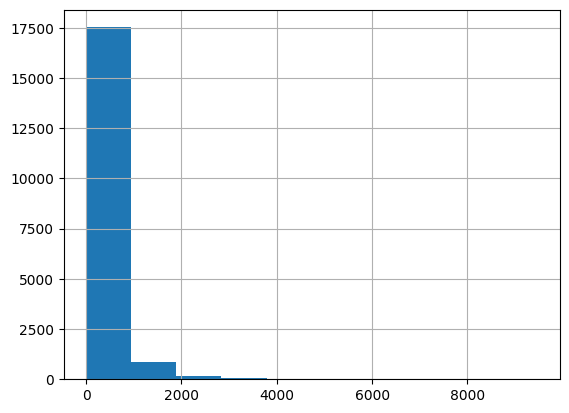

In [75]:
df['comment'].str.len().hist()

In [76]:
df['label'].value_counts()

label
positive    13701
negative     4953
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

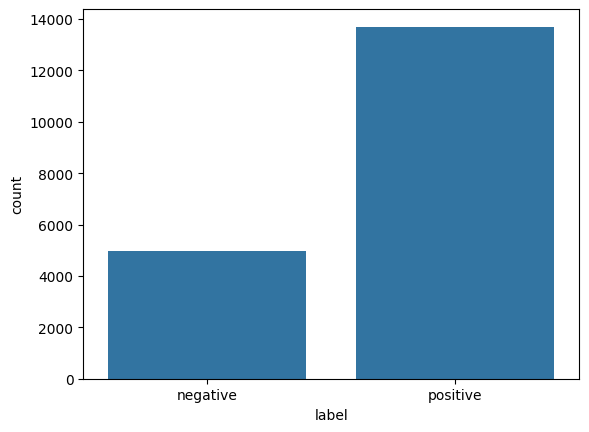

In [77]:
import seaborn as sns
sns.countplot(x='label', data=df)

In [78]:
df1 = df.copy()

In [79]:
def to_lower(text):
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower()
    return text

In [80]:
df1['comment'] =df1['comment'].apply(to_lower)

In [81]:
def xoa_dau_va_ki_tu_dac_biet(text):

    text = re.sub('https?://\S+|www\.\S+', '', text) # removing URL links
    text = re.sub(r"\b\d+\b", "", text) # removing number
    text = re.sub('<.*?>+', '', text) # removing special characters,
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # punctuations
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)

    return text

df1['comment'] = df1['comment'].apply(xoa_dau_va_ki_tu_dac_biet)

In [82]:
stop_words = list(set(stopwords.words('english')) - {'not','no'})
def remove_stopwords(comment):
    words = comment.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
# Thực hiện loại bỏ stopwords từ cột 'comment'
df1['comment'] = df1['comment'].apply(remove_stopwords)

In [83]:
wordnet_lem = WordNetLemmatizer()
df1['comment'] = df1['comment'].apply(lambda x: ' '.join([wordnet_lem.lemmatize(word, pos='v') for word in x.split()]))

In [84]:
from collections import Counter
cnt = Counter()
for text in df1['comment'].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

,word,count
0,sound,12074
1,headphones,10114
2,not,9621
3,use,7396
4,work,6125
5,good,6103
6,quality,6070
7,great,5329
8,get,5283
9,like,4748


In [85]:
# Remove the most frequent words:
FREQWORDS = set([w for (w, wc) in cnt.most_common(2)])
def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
df1['comment'] = df1['comment'].apply(lambda text: remove_freqwords(text))
df1

,comment,label
0,microphone bad cannot use zoom meet youre not ...,negative
1,buy early january great theyre comfortable goo...,positive
2,dis like ear bud no base soundu get pay,negative
3,weeks one ear bud already break hear leave one,negative
4,cheaply make try replace silicone cap earbud c...,negative
...,...,...
18649,best market dj musician regular old person lov...,negative
18650,great comfortable light wear hours game watch ...,positive
18651,look close back use along side sennheiser hd s...,positive
18652,perfect studio use need lot power drive things...,positive


In [86]:
df1.to_csv('/content/drive/MyDrive/Big_Data/data_clean.csv',index = False)